In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timedelta
import csv

/Users/michelpenke/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


API keys can be found here: https://twelvedata.com/account/api-keys

In [2]:
# Function to read API key from CSV
def get_api_key(file_path, service_name):
    with open(file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['service'] == service_name:
                return row['key']
    raise ValueError(f"API key for {service_name} not found in the CSV file")

In [3]:
# Twelve Data API endpoint and API key
BASE_URL = "https://api.twelvedata.com/time_series"

# Get API key from CSV file
API_KEY = get_api_key('api_keys.csv', 'twelve_data')

# Set up parameters for the API request
symbol = "BTC/USD"
interval = "1h"  # Changed to 1 hour interval
end_date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
start_date = (datetime.now() - timedelta(days=7)).strftime("%Y-%m-%d %H:%M:%S")  # Last 7 days

params = {
    "symbol": symbol,
    "interval": interval,
    "apikey": API_KEY,
    "start_date": start_date,
    "end_date": end_date
}

response = requests.get(BASE_URL, params=params)

             datetime         open         high          low        close  \
4 2024-11-05 07:00:00  68732.46000  68939.39000  68535.47000  68854.99000   
3 2024-11-05 08:00:00  68857.49000  69009.83000  68737.82000  68988.61000   
2 2024-11-05 09:00:00  68988.44000  69059.32000  68696.57000  68730.29000   
1 2024-11-05 10:00:00  68730.34000  68819.12000  68575.49000  68735.24000   
0 2024-11-05 11:00:00  68735.24000  68880.85000  68724.24000  68776.47000   

      price  
4  68854.99  
3  68988.61  
2  68730.29  
1  68735.24  
0  68776.47  
Current price: $68776.47 at 2024-11-05 11:00:00


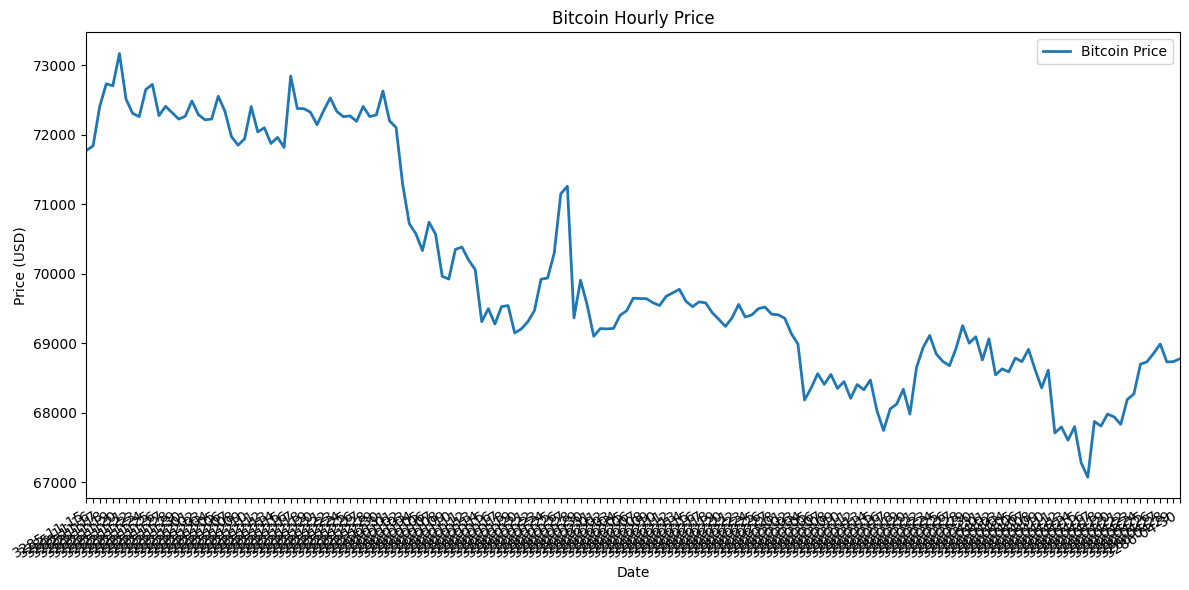

In [4]:
if response.status_code == 200:
    data = response.json()
    
    if "values" in data:
        # Convert the data to a pandas DataFrame
        df = pd.DataFrame(data["values"])
        
        # Convert datetime and numeric columns
        df["datetime"] = pd.to_datetime(df["datetime"])
        df["price"] = pd.to_numeric(df["close"])  # Using 'close' as the hourly price
        
        # Sort the DataFrame by date
        df = df.sort_values("datetime")
        
        print(df.tail())

        # Get current price (most recent price in the data)
        current_price = df["price"].iloc[-1]
        current_time = df["datetime"].iloc[-1]
        print(f"Current price: ${current_price:.2f} at {current_time}")

        # Plotting
        fig, ax = plt.subplots(figsize=(12, 6))

        df.plot(x='datetime', y='price', ax=ax, linewidth=2)

        plt.title('Bitcoin Hourly Price')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.xticks(rotation=45, ha='right')

        # Set major locator to days
        ax.xaxis.set_major_locator(mdates.DayLocator())

        # Define a custom formatter function for displaying dates
        def date_formatter(x, pos):
            date = mdates.num2date(x)
            return date.strftime('%Y-%m-%d')

        ax.xaxis.set_major_formatter(FuncFormatter(date_formatter))
        plt.gcf().autofmt_xdate()

        plt.legend(['Bitcoin Price'])

        plt.tight_layout()
        plt.show()

    else:
        print("No data found in the response")
else:
    print(f"Error: {response.status_code}")
    print(response.text)
